# Solving the equations of motion of a free rigid body

This notebook aims to approximate the solution of the equations of motion of a free rigid body for the initial condition $y_0=[\cos{(1.1)},0,\sin{(1.1)}]\in\mathbb{R}^3$. The differential equations we consider are
$$
\dot{\mathbf{x}}(t) = \begin{bmatrix} x_2(t)x_3(t)\frac{I_2-I_3}{I_2I_3} \\ -x_1(t)x_3(t)\frac{I_1-I_3}{I_1I_3} \\ x_1(t)x_2(t)\frac{I_1-I_2}{I_1I_2}\end{bmatrix},\,\,\mathbf{x}(t) = [x_1(t),x_2(t),x_3(t)].
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib

In [2]:
def hat(v):
    A = np.zeros((3,3))
    A[0,1] = -v[2]
    A[0,2] = v[1]
    A[1,2] = -v[0]

    A = A - A.T
    return A

def expSO3(w):
    A = hat(w)
    eA = scipy.linalg.expm(A)
    return eA

In [3]:
I1,I2,I3 = 2.,1.,2/3
y0 = np.array([np.cos(1.1),0.,np.sin(1.1)])
H = lambda y : (y[0]**2+y[1]**2+y[2]**2)
B = lambda y : np.array([[0.,y[2]/I3,-y[1]/I2],[-y[2]/I3,0.,y[0]/I1],[y[1]/I2,-y[0]/I1,0.]])
f = lambda y : B(y)@y
df = lambda y : np.array([
    [0,y[2]/I3-y[2]/I3,y[1]/I3-y[1]/I2],
    [-y[2]/I3+y[2]/I1,0.,-y[0]/I3+y[0]/I1],
    [y[1]/I2-y[1]/I1,y[0]/I2-y[0]/I1,0.]
])

fManiAlgebra = lambda y : np.array([-y[0]/I1,-y[1]/I2,-y[2]/I3])
lieEulerStep = lambda h,y: expSO3(h*fManiAlgebra(y))@y

In [4]:
h = 0.05
N = 800

In [5]:
sol_EE = np.zeros((3,N+1))
sol_LE = np.zeros((3,N+1))

sol_EE[:,0] = y0
sol_LE[:,0] = y0

for i in range(N):
  sol_EE[:,i+1] = sol_EE[:,i] + h * f(sol_EE[:,i])

for i in range(N):
  sol_LE[:,i+1] = lieEulerStep(h,sol_LE[:,i])

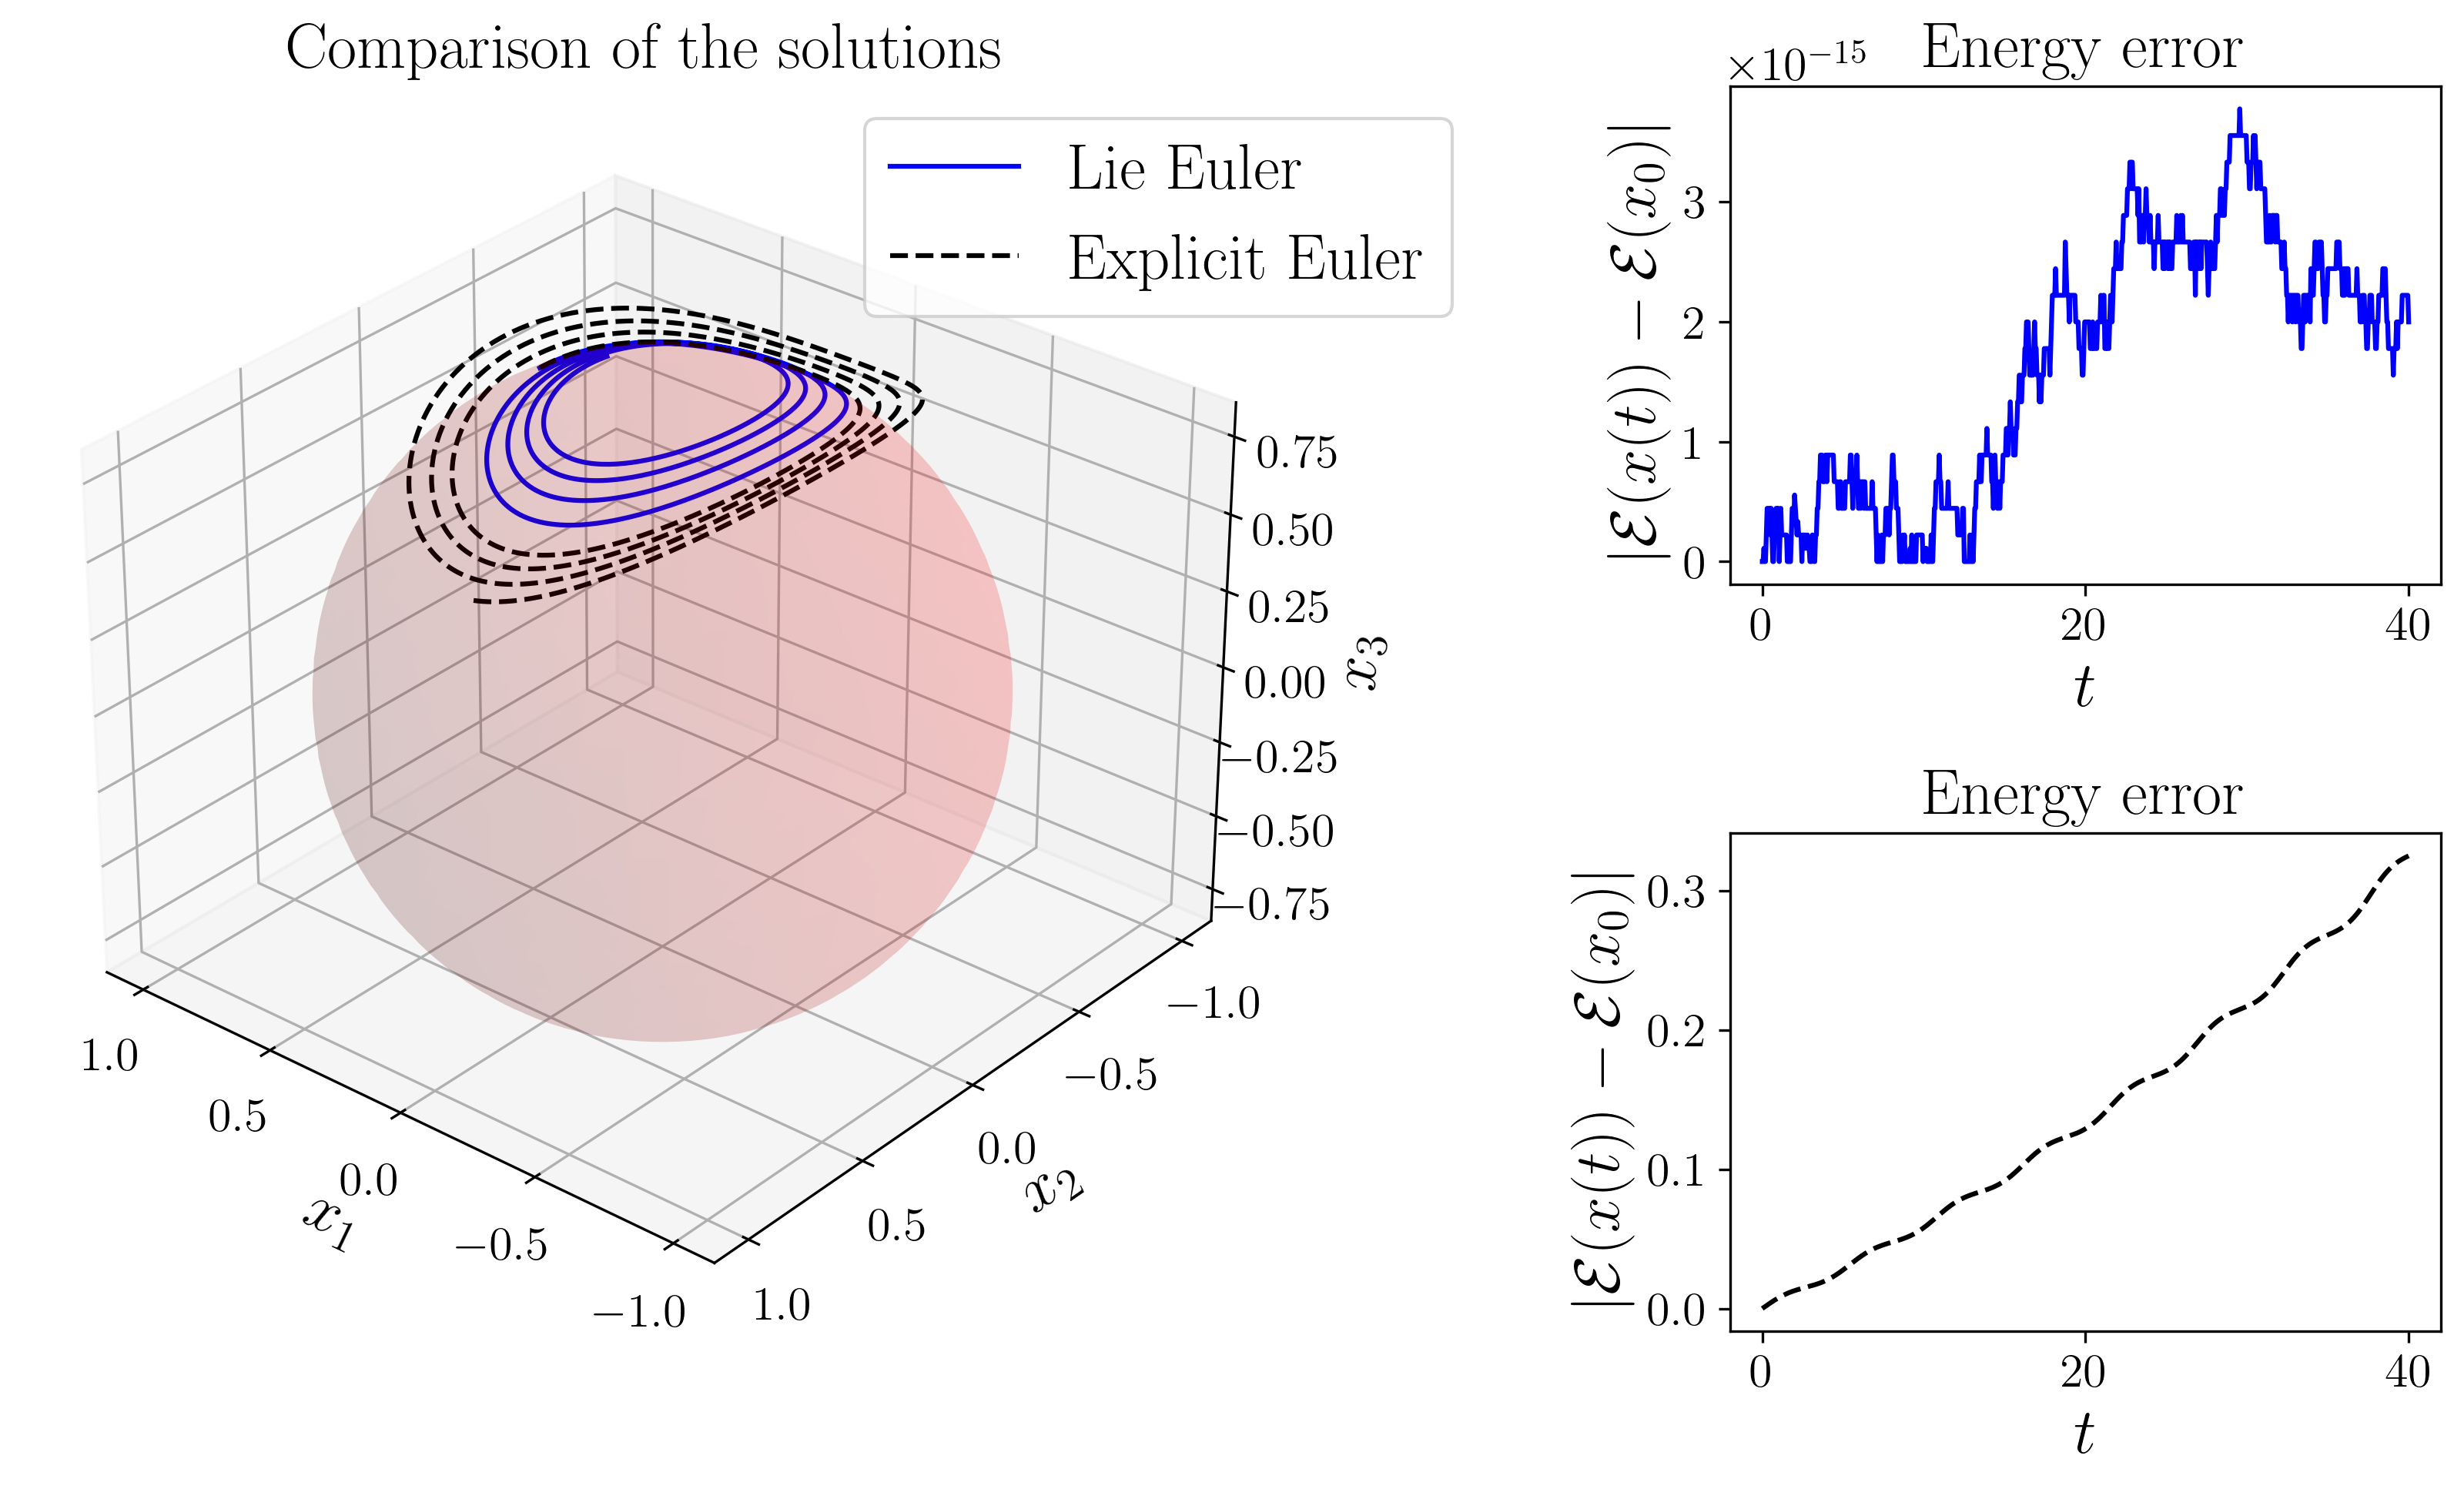

In [6]:
#Setting the plotting parameters
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams['font.size']= 45
matplotlib.rcParams['font.family']= 'ptm' #'Times New Roman

# Assuming sol_IM and sol_EE are defined earlier in your code

# Create a figure with 1 row and 2 columns of subplots
fig = plt.figure(figsize=(14, 7), dpi=300)
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1],hspace=0.5)

# First subplot for the 3D plot (Implicit Midpoint and Explicit Euler)
ax1 = fig.add_subplot(gs[:, 0], projection='3d')  # 1 row, 2 cols, 1st subplot

# Plot the curve from your data
ax1.plot(sol_LE[0], sol_LE[1], sol_LE[2], 'b-', label='Lie Euler')
ax1.plot(sol_EE[0], sol_EE[1], sol_EE[2], 'k--', label='Explicit Euler')

# Generate points for a unit sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the unit sphere on the first subplot
ax1.plot_surface(x, y, z, color='r', alpha=0.1)
ax1.set_xlabel(r'$x_1$',fontsize=20)
ax1.set_ylabel(r'$x_2$',fontsize=20)
ax1.set_zlabel(r'$x_3$',fontsize=20)

ax1.set_title("Comparison of the solutions",fontsize=20)

elev = 30  # Example elevation angle
azim = 130  # Example azimuth angle

ax1.view_init(elev=elev, azim=azim)

# After plotting the unit sphere
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0

mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5

ax1.set_xlim(mid_x - max_range, mid_x + max_range)
ax1.set_ylim(mid_y - max_range, mid_y + max_range)
ax1.set_zlim(mid_z - max_range, mid_z + max_range)

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='z', labelsize=15)

ax1.axis('equal')

# Second subplot (Placeholder for another plot)
ax2_0 = fig.add_subplot(gs[0,1])  # 1 row, 2 cols, 2nd subplot

# Example plot for the second subplot
# Replace this with your actual plotting code for the second plot
x_EE = np.linspace(0, N*h, N+1)
x_IM = np.linspace(0, N*h, N+1)
ax2_0.plot(x_IM, np.abs(H(sol_LE)-H(y0)), 'b-',label="Lie Euler")
ax2_0.set_title("Energy error",fontsize=20)
ax2_0.set_xlabel(r'$t$',fontsize=20)
ax2_0.set_ylabel(r'$|\mathcal{E}(x(t))-\mathcal{E}(x_0)|$',fontsize=20)
ax2_0.tick_params(axis='x', labelsize=15)
ax2_0.tick_params(axis='y', labelsize=15)
ax2_0.yaxis.get_offset_text().set_fontsize(15)

ax2_1 = fig.add_subplot(gs[1,1])  # 1 row, 2 cols, 2nd subplot

# Example plot for the second subplot
# Replace this with your actual plotting code for the second plot
x_EE = np.linspace(0, N*h, N+1)
x_IM = np.linspace(0, N*h, N+1)
ax2_1.plot(x_EE, np.abs(H(sol_EE)-H(y0)), 'k--',label="Explicit Euler")
ax2_1.set_title("Energy error",fontsize=20)
ax2_1.set_xlabel(r'$t$',fontsize=20)
ax2_1.set_ylabel(r'$|\mathcal{E}(x(t))-\mathcal{E}(x_0)|$',fontsize=20)
ax2_1.tick_params(axis='x', labelsize=15)
ax2_1.tick_params(axis='y', labelsize=15)
ax2_1.yaxis.get_offset_text().set_fontsize(15)
fig.subplots_adjust(wspace=0.35)
ax1.legend(fontsize=20,bbox_to_anchor=(0.65, 1))
plt.savefig("EnergyPreservation.pdf",bbox_inches='tight')
plt.show();